In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/hana1/project1/data/train.csv")
data_train.head()
data_test = pd.read_csv("/content/drive/MyDrive/hana1/project1/data/test.csv")
data_test.head()

<ipython-input-77-b784bc50218d>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("/content/drive/MyDrive/hana1/project1/data/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
data_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
# 불필요한 열 삭제
data_train.drop(['ID'] ,axis= 1 , inplace = True)

In [ ]:
def check_data_describing(df):
  print(df.shape)
  print('\n*********************************')
  print(df.describe().transpose())
  print('\n *********************************')
  print(df.info())

check_data_describing(data_train)

(100000, 27)

*********************************
                             count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card            

In [ ]:
def dirty_data_finding(df):
    dirty = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        dirty.append([col,dtype,nunique,null,duplicates])
    df_dirty_data_finding = pd.DataFrame(dirty)
    df_dirty_data_finding.columns = ['column','dtype','nunique','null','duplicates']
    return df_dirty_data_finding

dirty_data_finding(data_train)

,column,dtype,nunique,null,duplicates
0,Customer_ID,object,12500,0,87500
1,Month,object,8,0,99992
2,Name,object,10139,9985,89860
3,Age,object,1788,0,98212
4,SSN,object,12501,0,87499
5,Occupation,object,16,0,99984
6,Annual_Income,object,18940,0,81060
7,Monthly_Inhand_Salary,float64,13235,15002,86764
8,Num_Bank_Accounts,int64,943,0,99057
9,Num_Credit_Card,int64,1179,0,98821


In [ ]:
# 모든 열에 대한 정보
for e in data_train.columns:
  print(e)
  print(data_train[e].value_counts())
  print('\n**********************************\n')

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64

**********************************

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

**********************************

Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64

**********************************

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

****************

#### 이해할 수 없는 문자열 및 문자열 오류를 모두 정리합니다.

In [ ]:
data_train = data_train.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
data_train

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


#### 형변환

In [ ]:
data_train.Age = data_train.Age.astype(int)
data_train.Annual_Income = data_train.Annual_Income.astype(float)
data_train.Num_of_Loan = data_train.Num_of_Loan.astype(int)
data_train.Num_of_Delayed_Payment = data_train.Num_of_Delayed_Payment.astype(float)
data_train.Changed_Credit_Limit = data_train.Changed_Credit_Limit.astype(float)
data_train.Outstanding_Debt = data_train.Outstanding_Debt.astype(float)
data_train.Amount_invested_monthly = data_train.Amount_invested_monthly.astype(float)
data_train.Monthly_Balance = data_train.Monthly_Balance.astype(float)

In [ ]:
dirty_data_finding(data_train)

,column,dtype,nunique,null,duplicates
0,Customer_ID,object,12500,0,87500
1,Month,object,8,0,99992
2,Name,object,10128,9985,89871
3,Age,int64,1728,0,98272
4,SSN,object,12500,5572,87499
5,Occupation,object,15,7062,99984
6,Annual_Income,float64,13487,0,86513
7,Monthly_Inhand_Salary,float64,13235,15002,86764
8,Num_Bank_Accounts,int64,943,0,99057
9,Num_Credit_Card,int64,1179,0,98821


In [ ]:
check_data_describing(data_train)

(100000, 27)

*********************************
                             count          mean           std           min  \
Age                       100000.0  1.106497e+02  6.862447e+02 -5.000000e+02   
Annual_Income             100000.0  1.764157e+05  1.429618e+06  7.005930e+03   
Monthly_Inhand_Salary      84998.0  4.194171e+03  3.183686e+03  3.036454e+02   
Num_Bank_Accounts         100000.0  1.709128e+01  1.174048e+02 -1.000000e+00   
Num_Credit_Card           100000.0  2.247443e+01  1.290574e+02  0.000000e+00   
Interest_Rate             100000.0  7.246604e+01  4.664226e+02  1.000000e+00   
Num_of_Loan               100000.0  3.009960e+00  6.264788e+01 -1.000000e+02   
Delay_from_due_date       100000.0  2.106878e+01  1.486010e+01 -5.000000e+00   
Num_of_Delayed_Payment     92998.0  3.092334e+01  2.260319e+02 -3.000000e+00   
Changed_Credit_Limit       97909.0  1.038903e+01  6.789496e+00 -6.490000e+00   
Num_Credit_Inquiries       98035.0  2.775425e+01  1.931773e+02  0.000000

In [ ]:
for column in data_train.columns:
  print('The Columns :',column)
  print(data_train[column].value_counts())
  print('****************************************')

The Columns : Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
****************************************
The Columns : Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
****************************************
The Columns : Name
Langep              44
Stevex              44
Jessicad            39
Vaughanl            39
Raymondr            38
                    ..
McBrideq             4
Yinka Adegokec       4
Josephine Masonz     4
Vellacotto           4
Timothyl             3
Name: Name, Length: 10128, dtype: int64
****************************************
The Columns : Age
38      2994
28      2968
31      2955
26      2945
32      2884
        ... 
1908       1
4583       1
7549

In [ ]:
def cleaning_Null_columns(df_column,method,headlines):
  print('Before cleaning: \n',)
  print(df_column.value_counts(dropna = False).head(headlines))
  print('\n******************************************\n')
  print('After cleaning: \n')
  df_column.fillna(method = method, inplace = True)
  return df_column.value_counts(dropna = False)

## cleaning

### occupation

In [ ]:
# occupation 앞 값으로 채우기
cleaning_Null_columns(data_train['Occupation'],'ffill',30)

Before cleaning: 

NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

******************************************

After cleaning: 



Lawyer           7097
Engineer         6849
Architect        6832
Mechanic         6775
Scientist        6746
Accountant       6745
Media_Manager    6732
Developer        6712
Teacher          6685
Entrepreneur     6653
Doctor           6564
Journalist       6534
Manager          6422
Musician         6345
Writer           6309
Name: Occupation, dtype: int64

### Type_of_Loan

In [ ]:
# 앞 값으로 채우기
cleaning_Null_columns(data_train['Type_of_Loan'],'ffill',40)

Before cleaning: 

NaN                                                 11408
Not Specified                                        1408
Credit-Builder Loan                                  1280
Personal Loan                                        1272
Debt Consolidation Loan                              1264
Student Loan                                         1240
Payday Loan                                          1200
Mortgage Loan                                        1176
Auto Loan                                            1152
Home Equity Loan                                     1136
Personal Loan, and Student Loan                       320
Not Specified, and Payday Loan                        272
Mortgage Loan, and Home Equity Loan                   264
Student Loan, and Payday Loan                         256
Student Loan, and Credit-Builder Loan                 248
Credit-Builder Loan, and Not Specified                248
Payday Loan, and Debt Consolidation Loan             

Not Specified                                                                                                             1568
Personal Loan                                                                                                             1472
Debt Consolidation Loan                                                                                                   1464
Credit-Builder Loan                                                                                                       1416
Payday Loan                                                                                                               1400
                                                                                                                          ... 
Home Equity Loan, Debt Consolidation Loan, Home Equity Loan, Payday Loan, and Payday Loan                                    8
Debt Consolidation Loan, Payday Loan, Payday Loan, and Mortgage Loan                                           

### Credit_Mix





In [ ]:
cleaning_Null_columns(data_train['Credit_Mix'],'ffill',40)

Before cleaning: 

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64

******************************************

After cleaning: 



Standard    45820
Good        30351
Bad         23828
NaN             1
Name: Credit_Mix, dtype: int64

### Credit_History_Age

In [ ]:
cleaning_Null_columns(data_train['Credit_History_Age'],'ffill',40)

Before cleaning: 

NaN                       9030
15 Years and 11 Months     446
19 Years and 4 Months      445
19 Years and 5 Months      444
17 Years and 11 Months     443
19 Years and 3 Months      441
17 Years and 9 Months      438
15 Years and 10 Months     436
17 Years and 10 Months     435
15 Years and 9 Months      432
18 Years and 3 Months      428
18 Years and 4 Months      426
18 Years and 2 Months      426
19 Years and 9 Months      422
17 Years and 8 Months      419
15 Years and 8 Months      415
18 Years and 11 Months     414
16 Years and 2 Months      412
18 Years and 5 Months      410
18 Years and 10 Months     408
19 Years and 11 Months     405
19 Years and 10 Months     403
17 Years and 3 Months      403
19 Years and 8 Months      403
17 Years and 5 Months      402
18 Years and 9 Months      402
19 Years and 2 Months      401
16 Years and 5 Months      396
18 Years and 8 Months      396
16 Years and 8 Months      396
16 Years and 3 Months      396
17 Years and 4 Month

19 Years and 5 Months     498
17 Years and 11 Months    489
19 Years and 4 Months     487
19 Years and 3 Months     486
15 Years and 11 Months    486
                         ... 
0 Years and 3 Months       21
33 Years and 7 Months      18
0 Years and 2 Months       16
33 Years and 8 Months      15
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

### Payment_Behaviour

In [ ]:
cleaning_Null_columns(data_train['Payment_Behaviour'],'ffill',50)

Before cleaning: 

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
NaN                                  7600
Name: Payment_Behaviour, dtype: int64

******************************************

After cleaning: 



Low_spent_Small_value_payments      27593
High_spent_Medium_value_payments    19010
Low_spent_Medium_value_payments     14987
High_spent_Large_value_payments     14863
High_spent_Small_value_payments     12250
Low_spent_Large_value_payments      11297
Name: Payment_Behaviour, dtype: int64

### Age

In [ ]:
# 16 ~ 84, 이 사이 아닌 값은 랜덤으로 채우기
age_list = []
for ages in range(16,85,1):
  age_list.append(ages)

for age in data_train.Age:
  if age not in age_list:
    data_train['Age'].replace(age,random.choice(age_list),inplace = True)

### Annual Income


In [ ]:



# 500000 초과 값은 10으로 나눈 값으로 체인지
for income_value in data_train.Annual_Income:
  if income_value > 500000:
    New_income_value = income_value / 10
    data_train.Annual_Income.replace(income_value,New_income_value, inplace = True)

### Num_Bank_Accounts

In [ ]:
print('Describtion of the column:\n',data_train.Num_Bank_Accounts.describe())
print('\n*************************************\n')
print('Shape of the column:\n',data_train[data_train.Num_Bank_Accounts > 10].shape)
print('\n*************************************\n')
print('Value counts of the column:\n',data_train.Num_Bank_Accounts.value_counts().head(10))

Describtion of the column:
 count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

*************************************

Shape of the column:
 (1324, 27)

*************************************

Value counts of the column:
 6     13001
7     12823
8     12765
4     12186
5     12118
3     11950
9      5443
10     5247
1      4490
0      4328
Name: Num_Bank_Accounts, dtype: int64


In [ ]:

# most_common 에 포함되지 않은 숫자는 저 중에 랜덤으로 채우기
most_common_number = [0,1,2,3,4,5,6,7,8,9]
for num in data_train.Num_Bank_Accounts:
  if num not in most_common_number:
    data_train.Num_Bank_Accounts.replace(num,random.choice(most_common_number),inplace = True)

In [ ]:



data_train.Num_Bank_Accounts.value_counts()

6    18375
7    12975
8    12908
4    12294
5    12260
3    12070
9     5585
1     4610
0     4464
2     4459
Name: Num_Bank_Accounts, dtype: int64

### Num_Credit_Card

In [ ]:
print('Values of the column:\n',data_train.Num_Credit_Card.unique())
print('\n*************************************\n')
print('Shape of the column:\n',data_train[data_train['Num_Credit_Card'] > 10].shape)
print('\n*************************************\n')
print('Value counts of the column:\n',data_train.Num_Credit_Card.value_counts().head(15))

Values of the column:
 [   4 1385    5 ...  955 1430  679]

*************************************

Shape of the column:
 (2307, 27)

*************************************

Value counts of the column:
 5      18459
7      16615
6      16559
4      14030
3      13277
8       4956
10      4860
9       4643
2       2149
1       2132
11        36
0         13
849        8
852        7
183        6
Name: Num_Credit_Card, dtype: int64


In [ ]:
# 0 ~ 11 사이 랜덤으로
common_credit = []
for credit in range(0,12,1):
  common_credit.append(credit)

for num_of_credit in data_train.Num_Credit_Card:
  if num_of_credit not in common_credit:
    data_train.Num_Credit_Card.replace(num_of_credit,random.choice(common_credit),inplace = True)

In [ ]:
data_train.Num_Credit_Card.value_counts()

5     18672
7     16821
6     16725
4     14200
3     13471
8      5138
10     5048
9      4856
2      2345
1      2314
11      224
0       186
Name: Num_Credit_Card, dtype: int64

### Num_of_Loan

In [ ]:
def Preview_column(df_column,headline):
  print('Values of the column:\n',df_column.unique())
  print('\n*************************************\n')
  print('Value counts of the column:\n',df_column.value_counts().head(headline))

In [ ]:
Preview_column(data_train['Num_of_Loan'],20)

Values of the column:
 [   4    1    3  967 -100    0    2    7    5    6    8    9 1464  622
  352  472 1017  945  146  563  341  444  720 1485   49  737 1106  466
  728  313  843  597  617  119  663  640   92 1019  501 1302   39  716
  848  931 1214  186  424 1001 1110 1152  457 1433 1187   52 1480 1047
 1035 1347   33  193  699  329 1451  484  132  649  995  545  684 1135
 1094 1204  654   58  348  614 1363  323 1406 1348  430  153 1461  905
 1312 1424 1154   95 1353 1228  819 1006  795  359 1209  590  696 1185
 1465  911 1181   70  816 1369  143 1416  455   55 1096 1474  420 1131
  904   89 1259  527 1241  449  983  418  319   23  238  638  138  235
  280 1070 1484  274  494 1459  404 1354 1495 1391  601 1313 1319  898
  231  752  174  961 1046  834  284  438  288 1463 1151  719  198 1015
  855  841  392 1444  103 1320  745  172  252  630  241   31  405 1217
 1030 1257  137  157  164 1088 1236  777 1048  613  330 1439  321  661
  952  939  562 1202  302  943  394  955 1318  936  78

In [ ]:
# 음수와 10 이상 수를 그 사이 랜덤으로 체인지
for error_Loan in data_train.Num_of_Loan:
  if error_Loan > 9 or error_Loan < 0:
      data_train['Num_of_Loan'].replace(error_Loan,random.randint(0,9),inplace= True)

In [ ]:
data_train.Num_of_Loan.value_counts()

3    19019
2    15076
4    14799
0    10978
1    10648
6     7847
7     7394
5     7238
9     3755
8     3246
Name: Num_of_Loan, dtype: int64

### Num_of_Delayed_Payment

In [ ]:
Preview_column(data_train['Num_of_Delayed_Payment'],20)

Values of the column:
 [ 7.000e+00        nan  4.000e+00  8.000e+00  6.000e+00  1.000e+00
 -1.000e+00  3.000e+00  0.000e+00  5.000e+00  9.000e+00  1.200e+01
  1.500e+01  1.700e+01  1.000e+01  2.000e+00  1.100e+01  1.400e+01
  2.000e+01  2.200e+01  1.300e+01  1.600e+01  1.800e+01  1.900e+01
  2.300e+01  2.400e+01  2.100e+01  3.318e+03  3.083e+03  1.338e+03
  2.600e+01  3.104e+03  2.500e+01  1.830e+02  1.106e+03  8.340e+02
  2.672e+03  2.008e+03 -3.000e+00  5.380e+02  2.700e+01 -2.000e+00
  3.478e+03  2.420e+03  7.070e+02  7.080e+02  3.815e+03  2.800e+01
  1.867e+03  2.250e+03  1.463e+03  4.126e+03  2.882e+03  1.941e+03
  2.655e+03  2.628e+03  1.320e+02  3.069e+03  3.060e+02  3.539e+03
  3.684e+03  1.823e+03  4.128e+03  1.946e+03  8.270e+02  2.297e+03
  2.566e+03  9.040e+02  1.820e+02  9.290e+02  3.568e+03  2.503e+03
  1.552e+03  2.812e+03  1.697e+03  3.764e+03  8.510e+02  3.905e+03
  9.230e+02  8.800e+01  1.668e+03  3.253e+03  8.080e+02  2.689e+03
  3.858e+03  6.420e+02  3.457e+03  1.40

In [ ]:
data_train[data_train.Num_of_Delayed_Payment <0].shape

(644, 27)

In [ ]:
# delay < -5 or delay > 45:
Number_of_delayed = []
for number in data_train.Num_of_Delayed_Payment:
  if number < 40:
    Number_of_delayed.append(number)
Number_of_delayed = list(set(Number_of_delayed))
for delay in data_train.Num_of_Delayed_Payment:
  if delay < -5 or delay > 45:
    data_train.Num_of_Delayed_Payment.replace(delay,random.choice(Number_of_delayed),inplace= True)

In [ ]:

data_train.Num_of_Delayed_Payment.value_counts()

 19.0    5509
 17.0    5435
 16.0    5333
 10.0    5333
 15.0    5258
 18.0    5239
 20.0    5116
 12.0    5081
 9.0     5002
 8.0     4903
 11.0    4840
 14.0    4212
 13.0    4063
 21.0    2578
 7.0     2407
 22.0    2357
 6.0     2345
 5.0     2112
 23.0    2051
 3.0     1954
 4.0     1853
 2.0     1823
 24.0    1716
 25.0    1690
 1.0     1657
 0.0     1624
-1.0      343
 26.0     336
 27.0     274
-2.0      263
 28.0     169
-3.0      122
Name: Num_of_Delayed_Payment, dtype: int64

### Changed_Credit_Limit

In [ ]:
Preview_column(data_train['Changed_Credit_Limit'],20)

Values of the column:
 [11.27   nan  6.27 ... 17.51 25.16 21.17]

*************************************

Value counts of the column:
 8.22     133
11.50    127
11.32    126
10.06    121
7.35     121
8.23     115
11.49    113
9.25     110
7.33     110
7.69     110
3.93     107
1.63     106
8.30     106
7.01     105
8.76     102
8.99     102
8.54     102
8.04     101
7.23     101
9.20     100
Name: Changed_Credit_Limit, dtype: int64


In [ ]:
cleaning_Null_columns(data_train['Changed_Credit_Limit'],'ffill',50)

Before cleaning: 

NaN      2091
8.22      133
11.50     127
11.32     126
7.35      121
10.06     121
8.23      115
11.49     113
7.69      110
9.25      110
7.33      110
3.93      107
1.63      106
8.30      106
7.01      105
8.54      102
8.76      102
8.99      102
7.23      101
8.04      101
9.20      100
9.88      100
11.73     100
7.63       99
11.95      99
9.58       99
9.13       98
10.54      97
8.82       97
11.63      97
9.97       97
7.91       97
11.78      97
4.92       96
7.06       96
10.30      96
9.09       95
7.64       95
9.18       95
0.57       93
7.66       93
8.74       93
10.47      93
8.07       92
1.59       92
8.67       92
4.01       91
8.95       91
9.66       91
7.98       91
Name: Changed_Credit_Limit, dtype: int64

******************************************

After cleaning: 



 8.22     136
 11.50    128
 11.32    126
 10.06    125
 7.35     124
         ... 
-3.67       1
 29.44      1
 35.30      1
-2.85       1
 21.17      1
Name: Changed_Credit_Limit, Length: 4383, dtype: int64

In [ ]:
print(data_train[data_train['Changed_Credit_Limit'] == 0].shape)
print('\n****************************************************\n')
print(data_train[data_train['Changed_Credit_Limit'] < 0].shape)

(5, 27)

****************************************************

(1613, 27)


In [ ]:
# 음수값을 다 0으로
for credit in data_train['Changed_Credit_Limit']:
  if credit < 0:
    data_train['Changed_Credit_Limit'].replace(credit,0,inplace = True)

In [ ]:
data_train[data_train.Num_Credit_Inquiries.isnull()].shape

(1965, 27)

### Num_Credit_Inquiries

In [ ]:
Preview_column(data_train['Num_Credit_Inquiries'],30)

Values of the column:
 [   4.    2.    3. ... 1361.  310.   74.]

*************************************

Value counts of the column:
 4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
8.0        7866
1.0        7588
0.0        6972
5.0        5693
9.0        5283
11.0       5051
10.0       4936
12.0       4571
13.0       1480
14.0       1039
15.0        808
16.0        456
17.0        284
53.0          4
31.0          4
1114.0        4
1786.0        4
318.0         4
1622.0        4
1230.0        4
1768.0        4
1460.0        4
2297.0        4
2310.0        4
1244.0        4
Name: Num_Credit_Inquiries, dtype: int64


In [ ]:
print(data_train[data_train.Num_Credit_Inquiries > 50].shape)
print('\n*************************************************\n')
print(data_train[data_train.Num_Credit_Inquiries < 0].shape)

(1634, 27)

*************************************************

(0, 27)


In [ ]:
# 45 이상인 값들을 랜덤으로
Number_of_values = []
for number in data_train.Num_Credit_Inquiries:
  if number < 45  :
    Number_of_values.append(number)
Number_of_values = list(set(Number_of_values))
for delay in data_train.Num_Credit_Inquiries:
  if delay not in Number_of_values :
    data_train.Num_Credit_Inquiries.replace(delay,random.choice(Number_of_values),inplace= True)

### Credit_Utilization_Ratio

In [ ]:
data_train.Credit_Utilization_Ratio.value_counts()

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

In [ ]:
for approximate in  data_train.Credit_Utilization_Ratio:
  data_train.Credit_Utilization_Ratio.replace(approximate,round(approximate),inplace = True)

### Payment_of_Min_Amount

In [ ]:
data_train.Payment_of_Min_Amount.value_counts(dropna = False)

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
# nm => nan 처리
data_train.Payment_of_Min_Amount.replace('NM',np.NaN,inplace = True)
cleaning_Null_columns(data_train['Payment_of_Min_Amount'],'ffill',20)

Before cleaning: 

Yes    52326
No     35667
NaN    12007
Name: Payment_of_Min_Amount, dtype: int64

******************************************

After cleaning: 



Yes    59421
No     40579
Name: Payment_of_Min_Amount, dtype: int64

### Total_EMI_per_month

In [ ]:
data_train.Total_EMI_per_month.value_counts(dropna = False)

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

### Amount_invested_monthly

In [ ]:
data_train.Amount_invested_monthly.value_counts(dropna = False)

NaN             4479
10000.000000    4305
0.000000         169
36.662351          1
89.738489          1
                ... 
36.541909          1
93.451163          1
140.809722         1
38.739377          1
167.163865         1
Name: Amount_invested_monthly, Length: 91050, dtype: int64

In [ ]:
cleaning_Null_columns(data_train['Amount_invested_monthly'],'ffill',35)

Before cleaning: 

NaN             4479
10000.000000    4305
0.000000         169
36.662351          1
89.738489          1
59.937259          1
165.180659         1
62.030803          1
215.577059         1
44.611359          1
195.593832         1
131.028160         1
80.415295          1
90.654286          1
189.419067         1
219.026814         1
260.110033         1
351.726436         1
75.758867          1
81.773408          1
189.978959         1
318.111557         1
65.786080          1
27.151630          1
117.011093         1
56.216702          1
56.844695          1
274.902959         1
250.369280         1
210.403769         1
144.414029         1
49.737833          1
14.954207          1
121.048884         1
73.611396          1
Name: Amount_invested_monthly, dtype: int64

******************************************

After cleaning: 



10000.000000    4500
0.000000         177
101.415915         5
357.009409         4
231.127905         4
                ... 
410.736213         1
363.036612         1
358.567408         1
556.482655         1
167.163865         1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

### Monthly_Balance

In [ ]:
cleaning_Null_columns(data_train['Monthly_Balance'],'ffill',35)

Before cleaning: 

 NaN             1200
-3.333333e+26       9
 3.124941e+02       1
 3.474139e+02       1
 2.549709e+02       1
 2.500932e+02       1
 2.897551e+02       1
 2.606258e+02       1
 6.068304e+02       1
 1.119905e+02       1
 2.995454e+02       1
 5.595406e+02       1
 6.043402e+02       1
 5.896993e+02       1
 2.548709e+02       1
 4.860169e+02       1
 2.818843e+02       1
 2.998726e+02       1
 3.189338e+02       1
 3.199757e+02       1
 3.428948e+02       1
 3.355687e+02       1
 3.053245e+02       1
 3.435103e+02       1
 2.520849e+02       1
 2.780964e+02       1
 3.704370e+02       1
 6.711342e+02       1
 5.627838e+02       1
 5.203974e+02       1
 4.417318e+02       1
 4.792387e+02       1
 6.698565e+02       1
 2.696689e+02       1
 5.133383e+02       1
Name: Monthly_Balance, dtype: int64

******************************************

After cleaning: 



-3.333333e+26    9
 2.975443e+02    5
 1.836513e+02    4
 3.163839e+02    4
 3.644048e+02    4
                ..
 3.145323e+02    1
 2.693125e+02    1
 2.151233e+02    1
 2.717806e+02    1
 3.936737e+02    1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [ ]:
# 음수값 살려둠
for balance in data_train['Monthly_Balance']:
  if balance < 0 :
    data_train['Monthly_Balance'].replace(balance,-balance,inplace = True)

In [ ]:
Preview_column(data_train['Monthly_Balance'],None)

Values of the column:
 [312.49408868 284.6291625  331.20986285 ... 516.80908327 319.16497853
 393.67369556]

*************************************

Value counts of the column:
 3.333333e+26    9
2.975443e+02    5
1.836513e+02    4
3.163839e+02    4
3.644048e+02    4
               ..
3.145323e+02    1
2.693125e+02    1
2.151233e+02    1
2.717806e+02    1
3.936737e+02    1
Name: Monthly_Balance, Length: 98792, dtype: int64


In [ ]:
dirty_data_finding(data_train)

,column,dtype,nunique,null,duplicates
0,Customer_ID,object,12500,0,87500
1,Month,object,8,0,99992
2,Name,object,10128,9985,89871
3,Age,int64,69,0,99931
4,SSN,object,12500,5572,87499
5,Occupation,object,15,0,99985
6,Annual_Income,float64,13487,0,86513
7,Monthly_Inhand_Salary,float64,13235,15002,86764
8,Num_Bank_Accounts,int64,10,0,99990
9,Num_Credit_Card,int64,12,0,99988


### Num_of_Delayed_Payment

In [ ]:
cleaning_Null_columns(data_train['Num_of_Delayed_Payment'],'ffill',None)

Before cleaning: 

 NaN     7002
 19.0    5509
 17.0    5435
 16.0    5333
 10.0    5333
 15.0    5258
 18.0    5239
 20.0    5116
 12.0    5081
 9.0     5002
 8.0     4903
 11.0    4840
 14.0    4212
 13.0    4063
 21.0    2578
 7.0     2407
 22.0    2357
 6.0     2345
 5.0     2112
 23.0    2051
 3.0     1954
 4.0     1853
 2.0     1823
 24.0    1716
 25.0    1690
 1.0     1657
 0.0     1624
-1.0      343
 26.0     336
 27.0     274
-2.0      263
 28.0     169
-3.0      122
Name: Num_of_Delayed_Payment, dtype: int64

******************************************

After cleaning: 



 19.0    5915
 17.0    5794
 16.0    5744
 10.0    5732
 15.0    5670
 18.0    5649
 20.0    5510
 12.0    5471
 9.0     5350
 8.0     5249
 11.0    5200
 14.0    4534
 13.0    4387
 21.0    2779
 7.0     2591
 6.0     2541
 22.0    2532
 5.0     2272
 23.0    2211
 3.0     2102
 4.0     1976
 2.0     1964
 24.0    1833
 25.0    1827
 1.0     1793
 0.0     1746
 26.0     365
-1.0      364
 27.0     304
-2.0      280
 28.0     182
-3.0      133
Name: Num_of_Delayed_Payment, dtype: int64

### Monthly_Inhand_Salary

In [ ]:
Preview_column(data_train['Monthly_Inhand_Salary'],20)

Values of the column:
 [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]

*************************************

Value counts of the column:
 6769.130000     15
6358.956667     15
2295.058333     15
6082.187500     15
3080.555000     14
4387.272500     13
5766.491667     13
6639.560000     13
536.431250      12
1315.560833     11
2557.861667      9
1476.062917      8
2610.171667      8
9641.480000      8
11624.846667     8
1393.486667      8
1801.474167      8
7554.577500      8
1365.173333      8
1474.625417      8
Name: Monthly_Inhand_Salary, dtype: int64


In [ ]:
print(data_train['Monthly_Inhand_Salary'].min())
print('\n***************************************\n')
print(data_train['Monthly_Inhand_Salary'].max())

303.6454166666666

***************************************

15204.633333333331


In [ ]:
cleaning_Null_columns(data_train['Monthly_Inhand_Salary'],'ffill',50)

Before cleaning: 

NaN             15002
2295.058333        15
6082.187500        15
6769.130000        15
6358.956667        15
3080.555000        14
4387.272500        13
6639.560000        13
5766.491667        13
536.431250         12
1315.560833        11
2557.861667         9
1745.225833         8
1611.983333         8
7354.502500         8
2485.915000         8
9552.435000         8
6118.796667         8
2607.336667         8
9402.843333         8
3786.346667         8
10426.133333        8
5191.665000         8
3516.355000         8
10304.630000        8
4962.225000         8
2510.705833         8
10125.926667        8
2556.730000         8
2879.183333         8
1312.373333         8
4571.025000         8
4896.556667         8
5311.010000         8
3201.376667         8
9295.403333         8
2703.896667         8
8613.730000         8
7840.912500         8
1503.951250         8
1342.941667         8
564.313750          8
7224.945000         8
4769.945000         8
1334.442500  

6358.956667    18
3080.555000    17
6769.130000    16
6082.187500    16
1315.560833    16
               ..
6450.393333     1
8836.177500     1
1904.390000     1
2073.414167     1
1387.232104     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

### name

In [ ]:
cleaning_Null_columns(data_train['Name'],'ffill',50)

Before cleaning: 

NaN                       9985
Langep                      44
Stevex                      44
Vaughanl                    39
Jessicad                    39
Johnc                       38
Danielz                     38
Jessica Wohlt               38
Raymondr                    38
Deepa Seetharamanm          38
Nicko                       37
Lucia Mutikanip             37
Strupczewskid               37
Michaelr                    37
Nate Raymondw               37
Jonathan Stempelr           37
Ronald Groverk              36
Phil Wahbag                 36
Jonesb                      36
Ryan Vlastelicad            36
env                         36
Phila                       35
Davidc                      35
Kimj                        35
Valetkevitchv               34
Andreaj                     33
Rick Rothackerm             32
Huwk                        32
Alexei Oreskovics           32
Davidw                      31
Poornima Guptav             31
Edwardsk            

Jessicad              49
Langep                48
Stevex                48
Ronald Groverk        41
Jonesb                41
                      ..
Daniel Basesg          5
Frankc                 5
Anurags                5
OBoyle"f               5
Olesya Dmitracovaq     4
Name: Name, Length: 10128, dtype: int64

### ssn

In [ ]:
cleaning_Null_columns(data_train['SSN'],'ffill',50)

Before cleaning: 

NaN            5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
376-28-6303       8
194-93-5515       8
442-30-8588       8
362-78-8068       8
221-76-9774       8
307-67-5773       8
712-45-6575       8
236-43-2661       8
005-71-5332       8
418-89-9094       8
424-83-6470       8
879-19-2481       8
439-76-5364       8
424-24-7936       8
844-17-9667       8
239-94-3241       8
122-80-2393       8
176-63-8953       8
598-28-8368       8
215-69-1291       8
432-19-3861       8
167-27-0881       8
203-97-2628       8
847-83-6051       8
107-09-2657       8
789-03-7943       8
420-51-6685       8
339-34-1758       8
410-95-7076       8
968-82-9543       8
893-00-5940       8
175-37-1300       8
110-85-1519       8
767-53-7638       8
483-01-4711       8
277-59-7271       8
716-17-7548       8
298-29-8622       8
790-76-9764       8
556-28-1765       8
681-32-9435       8
401-73-3467       8
098-96-4178       8
811-90-5713       8
9

394-01-9302    11
257-88-2315    10
134-52-6017    10
579-77-5566    10
824-81-1271    10
               ..
609-29-1019     6
046-42-3163     6
039-48-4190     6
708-15-7663     6
414-76-9835     5
Name: SSN, Length: 12500, dtype: int64

In [ ]:
dirty_data_finding(data_train)

,column,dtype,nunique,null,duplicates
0,Customer_ID,object,12500,0,87500
1,Month,object,8,0,99992
2,Name,object,10128,0,89872
3,Age,int64,69,0,99931
4,SSN,object,12500,0,87500
5,Occupation,object,15,0,99985
6,Annual_Income,float64,13487,0,86513
7,Monthly_Inhand_Salary,float64,13235,0,86765
8,Num_Bank_Accounts,int64,10,0,99990
9,Num_Credit_Card,int64,12,0,99988


### credit mix

In [ ]:
cleaning_Null_columns(data_train['Credit_Mix'],'ffill',50)

Before cleaning: 

Standard    45820
Good        30351
Bad         23828
NaN             1
Name: Credit_Mix, dtype: int64

******************************************

After cleaning: 



Standard    45820
Good        30351
Bad         23828
NaN             1
Name: Credit_Mix, dtype: int64

In [ ]:
data_train['Credit_Mix'].fillna('Good',inplace = True)

In [ ]:
cleaning_Null_columns(data_train['Credit_Score'],'ffill',50)

Before cleaning: 

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

******************************************

After cleaning: 



Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

## eda

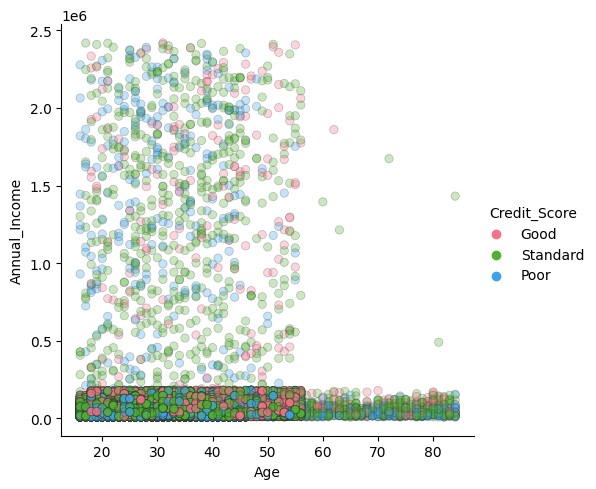

In [ ]:
sns.relplot(x = 'Age', y = 'Annual_Income' ,hue = 'Credit_Score', data = data_train,alpha=.3, edgecolor=".2", linewidth=.5,palette = 'husl')

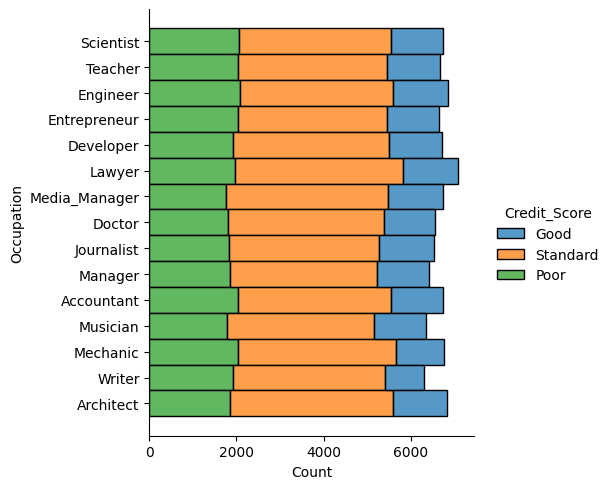

In [ ]:
sns.displot(data=data_train, y="Occupation", hue="Credit_Score", multiple="stack")

## 데이터 전처리

In [ ]:
data_train.drop(['Customer_ID','Name','SSN'] ,axis= 1 , inplace = True)

### ordinalencoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in data_train.columns:
  if data_train[column].dtypes == 'object':
    data_train[column] = ordinal_encoder.fit_transform(data_train[[column]])


from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in data_test.columns:
  if data_test[column].dtypes == 'object':
    data_test[column] = ordinal_encoder.fit_transform(data_test[[column]])

In [ ]:
X = data_train.copy()
y = X.pop("Credit_Score")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

Annual_Income               0.620425
Outstanding_Debt            0.613446
Monthly_Inhand_Salary       0.600100
Total_EMI_per_month         0.548926
Type_of_Loan                0.329071
Interest_Rate               0.180973
Credit_Mix                  0.174263
Delay_from_due_date         0.120118
Payment_of_Min_Amount       0.116150
Num_Credit_Inquiries        0.109274
Changed_Credit_Limit        0.103658
Num_Credit_Card             0.099776
Credit_History_Age          0.097108
Num_Bank_Accounts           0.092394
Num_of_Delayed_Payment      0.086411
Num_of_Loan                 0.080785
Age                         0.025189
Amount_invested_monthly     0.023038
Month                       0.002604
Credit_Utilization_Ratio    0.001588
Payment_Behaviour           0.001582
Monthly_Balance             0.000050
Occupation                  0.000000
Name: MI Scores, dtype: float64


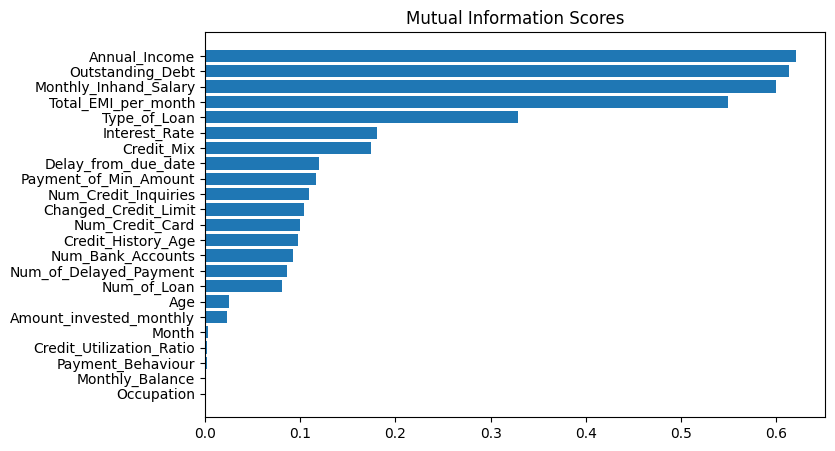

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
# 불필요한 열 제거
data_train.drop(['Month','Monthly_Balance',
                'Occupation','Credit_Utilization_Ratio',
                 'Payment_Behaviour'] ,axis= 1 , inplace = True)

In [ ]:
# 표준화를 왜 이렇게.. ?
data_train.Annual_Income = (data_train.Annual_Income - data_train.Annual_Income.mean())/data_train.Annual_Income.std()
data_train.Monthly_Inhand_Salary = (data_train.Monthly_Inhand_Salary - data_train.Monthly_Inhand_Salary.mean())/data_train.Monthly_Inhand_Salary.std()
data_train.Type_of_Loan = (data_train.Type_of_Loan - data_train.Type_of_Loan.mean())/data_train.Type_of_Loan.std()
data_train.Outstanding_Debt = (data_train.Outstanding_Debt - data_train.Outstanding_Debt.mean())/data_train.Outstanding_Debt.std()
data_train.Credit_History_Age = (data_train.Credit_History_Age - data_train.Credit_History_Age.mean())/data_train.Credit_History_Age.std()
data_train.Total_EMI_per_month = (data_train.Total_EMI_per_month - data_train.Total_EMI_per_month.mean())/data_train.Total_EMI_per_month.std()
data_train.Amount_invested_monthly = (data_train.Amount_invested_monthly - data_train.Amount_invested_monthly.mean())/data_train.Amount_invested_monthly.std()

In [ ]:
data_train.head(5)


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Credit_Score
0,23,-0.302336,-0.743856,3,4,3,4,-1.667336,3,7.0,11.27,4.0,1.0,-0.533482,-0.143107,0.0,-0.162959,-0.272558,0.0
1,23,-0.302336,-0.743856,3,4,3,4,-1.667336,-1,7.0,11.27,4.0,1.0,-0.533482,-0.143107,0.0,-0.162959,-0.254014,0.0
2,61,-0.302336,-0.743856,3,4,3,4,-1.667336,3,7.0,11.27,4.0,1.0,-0.533482,-0.106859,0.0,-0.162959,-0.271930,0.0
3,23,-0.302336,-0.743856,3,4,3,4,-1.667336,5,4.0,6.27,4.0,1.0,-0.533482,-0.097798,0.0,-0.162959,-0.214256,0.0
4,23,-0.302336,-0.743856,3,4,3,4,-1.667336,6,4.0,11.27,4.0,1.0,-0.533482,-0.088736,0.0,-0.162959,-0.291657,0.0


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
x = data_train.drop('Credit_Score',axis=1).values
y = data_train['Credit_Score'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1, random_state=25)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

NameError: ignored

# ml

In [ ]:
ETC_Updated= ExtraTreesClassifier(n_estimators = 2000,bootstrap = True)
ETC_Updated.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=True, n_estimators=2000)

In [ ]:
print(ETC_Updated.score(x_train,y_train))
ETC_Updated.score(x_test,y_test)

0.9999555555555556


0.8153

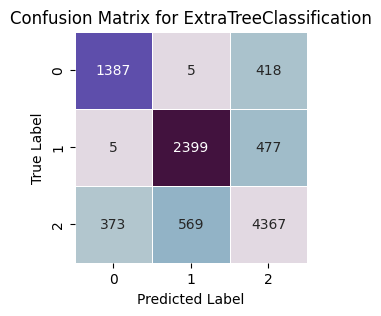

In [ ]:
# Plot confusion matrix for ExtraTreeClassifier.
matrix = confusion_matrix(y_test,ETC_Updated.predict(x_test))
plt.figure(figsize=(3,3))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for ExtraTreeClassification');

In [ ]:
print('\n clasification report:\n', classification_report(y_test,ETC_Updated.predict(x_test)))


 clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      1810
         1.0       0.81      0.83      0.82      2881
         2.0       0.83      0.82      0.83      5309

    accuracy                           0.82     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.82      0.82      0.82     10000



### 데이터 균형 조정

In [ ]:
SMT = SMOTE()
x_SMT, y_SMT = SMT.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.15, random_state=42)

In [ ]:
print(x_train_smote.shape,x_test_smote.shape,y_train_smote.shape,y_test_smote.shape)

(135593, 18) (23929, 18) (135593,) (23929,)


In [ ]:
ETC_Mod= ExtraTreesClassifier(n_estimators = 2000,bootstrap = True)
ETC_Mod.fit(x_train_smote, y_train_smote)

NameError: ignored

In [ ]:
print(ETC_Mod.score(x_train_smote,y_train_smote))
y_pred = ETC_Mod.predict(x_test_smote)
accuracy_score(y_test_smote,y_pred)

In [ ]:
print(ETC_Mod.score(x_train_smote,y_train_smote))
y_pred = ETC_Mod.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
# Plot confusion matrix for ExtraTreeClassifier.
matrix = confusion_matrix(y_test_smote,ETC_Mod.predict(x_test_smote))
plt.figure(figsize=(3,3))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for ExtraTreeClassification trainig smoted data, tested smoted data');

In [ ]:
# Plot confusion matrix for ExtraTreeClassifier.
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)
matrix = confusion_matrix(y_test,ETC_Mod.predict(x_test))
plt.figure(figsize=(3,3))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for ExtraTreeClassification trainig smoted data, tested real data');

NameError: ignored

In [ ]:
print('\n clasification report:\n', classification_report(y_test_smote,ETC_Mod.predict(x_test_smote)))

In [ ]:
print('\n clasification report:\n', classification_report(y_test,ETC_Mod.predict(x_test)))